In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

from yahoo_fin.stock_info import get_data


In [2]:
XRT_df= get_data("XRT", start_date="12/04/2010", end_date="12/04/2022", index_as_date = False, interval="1d")
XRT_df

,date,open,high,low,close,adjclose,volume,ticker
0,2010-12-06,24.035000,24.065001,23.905001,24.020000,20.578669,15320800,XRT
1,2010-12-07,24.299999,24.905001,23.885000,23.889999,20.467291,25254600,XRT
2,2010-12-08,23.950001,23.980000,23.680000,23.785000,20.377335,18244800,XRT
3,2010-12-09,23.995001,23.995001,23.730000,23.930000,20.501564,9641200,XRT
4,2010-12-10,23.915001,24.100000,23.820000,24.070000,20.621498,12218200,XRT
...,...,...,...,...,...,...,...,...
2945,2022-08-18,71.989998,72.070000,70.949997,71.720001,71.720001,3019400,XRT
2946,2022-08-19,70.800003,71.139999,69.029999,69.419998,69.419998,5839000,XRT
2947,2022-08-22,68.180000,68.300003,67.059998,67.230003,67.230003,7351600,XRT
2948,2022-08-23,67.699997,68.660004,67.260002,67.349998,67.349998,3073700,XRT


In [ ]:
#XRT_df = XRT_df.drop("ticker", axis=1)

In [ ]:
#XRT_df.to_csv("XRT.csv", index=False)

In [ ]:
#XRT_df = pd.read_csv('XRT.csv')

In [3]:
print(XRT_df.describe())

              open         high          low        close     adjclose  \
count  2950.000000  2950.000000  2950.000000  2950.000000  2950.000000   
mean     46.573800    47.006097    46.107307    46.566137    43.470904   
std      17.285084    17.519894    17.008970    17.258505    17.949121   
min      22.000000    22.545000    21.750000    21.915001    18.926882   
25%      39.207500    39.463749    38.799999    39.137501    35.762766   
50%      43.514999    43.840000    43.150002    43.490002    40.037018   
75%      48.357500    48.758749    48.057501    48.465001    44.300468   
max     104.160004   104.309998   102.410004   104.160004   102.392715   

             volume  
count  2.950000e+03  
mean   7.079911e+06  
std    6.123522e+06  
min    5.547000e+05  
25%    3.420950e+06  
50%    5.113400e+06  
75%    7.977900e+06  
max    4.876300e+07  


In [ ]:
#print the summary 
print(XRT_df.describe())

In [4]:
#now prep the data for 2014-2019
XRT_df.set_index(pd.DatetimeIndex(XRT_df['date']), inplace=True)

In [5]:
#Keep the close for 2014-19
XRT_df = XRT_df[['close']]

In [6]:
print(XRT_df)

                close
date                 
2010-12-06  24.020000
2010-12-07  23.889999
2010-12-08  23.785000
2010-12-09  23.930000
2010-12-10  24.070000
...               ...
2022-08-18  71.720001
2022-08-19  69.419998
2022-08-22  67.230003
2022-08-23  67.349998
2022-08-24  66.629997

[2950 rows x 1 columns]


In [7]:
print (XRT_df.index.max())

2022-08-24 00:00:00


In [ ]:
XRT_df

In [ ]:
XRT_dataset = XRT_df.values

In [ ]:
XRT_dataset

In [9]:
#data_14_22 = XRT_df.filter(['Close'])
#dataset_14_22 = data_14_22.values
XRT_data = XRT_df.filter(['close'])
XRT_dataset = XRT_data.values
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_data = scaler.fit_transform(dataset_14_22)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(XRT_dataset)


training_data_len =math.ceil(len(XRT_dataset) *.7)
train_data =scaled_data[0:training_data_len , : ]


X_train_data = []
y_train_data = []

for i in range(1500,len(train_data)):
    X_train_data=list(X_train_data)
    y_train_data=list(y_train_data)
    X_train_data.append(train_data[i-1500:i,0])
    y_train_data.append(train_data[i,0])

    X_train_data1, y_train_data1 = np.array(X_train_data), np.array(y_train_data)

    #X_train_data1, y_train_data1 = np.array(X_train_data), np.array(y_train_data)
    
    X_train_data2 = np.reshape(X_train_data1,(X_train_data1.shape[0],X_train_data1.shape[1],1))

   
    
#1500 = number of days you can change it accordingly. 

# There will be a total of 60 values, 1st column will contain an index of 0-59
# The second will have an index of 1-60 ++_
# the y_train has the 60 st value on c1 and c2 will have 61++

In [10]:
#Lets build the LSTM MODEL 

model = Sequential()

model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_data2.shape[1],1)))

model.add(LSTM(units=50, return_sequences=False))

model.add(Dense(units=25))

model.add(Dense(units=1))


#okay this example will have 2 LSTM layers w/50 neurons and 2 dense layers
# plust one with 25 nuerons 

In [11]:
# Complete the model 

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_data2, y_train_data1, batch_size=1, epochs=1)

565/565 [==============================] - 215s 377ms/step - loss: 9.3518e-04


In [12]:
test_data = scaled_data[training_data_len -1500: , : ]

X_test = []

y_test = XRT_dataset[training_data_len : , : ]

for i in range(1500,len(test_data)):
    
    X_test.append(test_data[i-1500:i,0])

X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)

28/28 [==============================] - 6s 197ms/step


In [13]:
# Error calculation where RMSE = root mean squared error 

rmse=np.sqrt(np.mean(((predictions-y_test)**2)))

In [14]:
print(rmse)

5.7453400166590445


In [ ]:
#OOOF okay the lower the value is to 0 the better
# it indicates that the models p-value match the actual values from the data set 
# which in this case it does not. 

C:\Users\matth\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


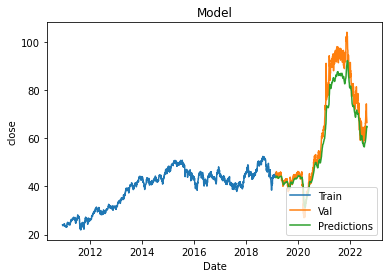

In [18]:
#Predict and visualize 

train = XRT_df[:training_data_len]

valid = XRT_df[training_data_len:]

valid['Predictions'] = predictions

plt.title('Model')

plt.xlabel('Date')

plt.ylabel('close')

plt.plot(train['close'])

plt.plot(valid[['close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

In [19]:
XRT_dataset.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [21]:
train['close']

date
2010-12-06    24.020000
2010-12-07    23.889999
2010-12-08    23.785000
2010-12-09    23.930000
2010-12-10    24.070000
                ...    
2019-02-13    44.910000
2019-02-14    44.820000
2019-02-15    45.340000
2019-02-19    45.580002
2019-02-20    45.650002
Name: close, Length: 2065, dtype: float64

In [121]:
valid[['close', 'Predictions']]

c:\Users\matth\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [120]:
complete_XRT_df = pd.concat([train[['close']], valid[['close', 'Predictions']]])
complete_XRT_df

c:\Users\matth\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices